In [15]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv(r'music_최종_계절구분.csv', parse_dates=['발매일'], encoding='utf-8')
raw_df.head()

,순위,제목,가수,가사,장르,발매일,Month,Season
0,1,사랑을 했다 (LOVE SCENARIO),iKON,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,랩/힙합,2018-01-25,201803,2018_봄
1,2,별이 빛나는 밤,마마무 (Mamamoo),손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,댄스,2018-03-07,201803,2018_봄
2,3,뿜뿜,모모랜드 (MOMOLAND),설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,댄스,2018-01-03,201803,2018_봄
3,4,그날처럼,장덕철,참 많은 시간이 흘러가고 넌 어떻게 사는지 참 궁금해 날 걱정하는 사람들에게 다 잊...,발라드,2017-11-28,201803,2018_봄
4,5,꽃 길,BIGBANG (빅뱅),그땐 참 좋았는데 말이야 너와 함께할 수만 있다면 때론 외롭고 슬퍼도 말이야 너와 ...,R&B/Soul,2018-03-13,201803,2018_봄


In [16]:
raw_df[['year', 'season']] = raw_df['Season'].str.split('_', expand=True)
raw_df.head()

,순위,제목,가수,가사,장르,발매일,Month,Season,year,season
0,1,사랑을 했다 (LOVE SCENARIO),iKON,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,랩/힙합,2018-01-25,201803,2018_봄,2018,봄
1,2,별이 빛나는 밤,마마무 (Mamamoo),손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,댄스,2018-03-07,201803,2018_봄,2018,봄
2,3,뿜뿜,모모랜드 (MOMOLAND),설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,댄스,2018-01-03,201803,2018_봄,2018,봄
3,4,그날처럼,장덕철,참 많은 시간이 흘러가고 넌 어떻게 사는지 참 궁금해 날 걱정하는 사람들에게 다 잊...,발라드,2017-11-28,201803,2018_봄,2018,봄
4,5,꽃 길,BIGBANG (빅뱅),그땐 참 좋았는데 말이야 너와 함께할 수만 있다면 때론 외롭고 슬퍼도 말이야 너와 ...,R&B/Soul,2018-03-13,201803,2018_봄,2018,봄


In [17]:
# spring = raw_df[raw_df['season'] == '봄']
# summer = raw_df[raw_df['season'] == '여름']
# fall = raw_df[raw_df['season'] == '가을']
# winter = raw_df[raw_df['season'] == '겨울']

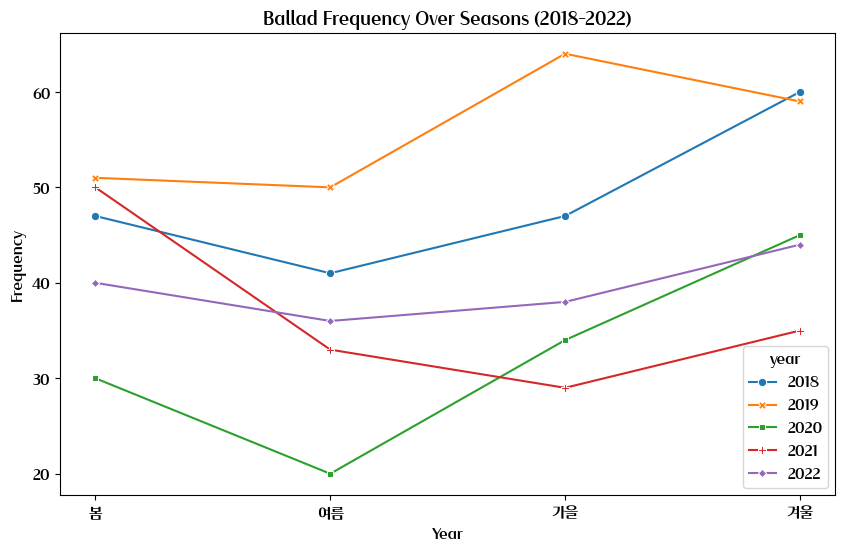

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

ballad_df = raw_df[raw_df['장르'] == '발라드']
grouped_df = ballad_df.groupby(['year', 'season']).size().reset_index(name='count')

season_order = ['봄', '여름', '가을', '겨울']
grouped_df['season'] = pd.Categorical(grouped_df['season'], categories=season_order, ordered=True)

pivot_df = grouped_df.pivot(index='season', columns='year', values='count').fillna(0)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()

plt.rc('font', family=font_name)

plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_df, markers=True, dashes=False)

plt.title('Ballad Frequency Over Seasons (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [19]:
ballad_df.groupby(['year', 'season']).size()

year  season
2018  가을        47
      겨울        60
      봄         47
      여름        41
2019  가을        64
      겨울        59
      봄         51
      여름        50
2020  가을        34
      겨울        45
      봄         30
      여름        20
2021  가을        29
      겨울        35
      봄         50
      여름        33
2022  가을        38
      겨울        44
      봄         40
      여름        36
dtype: int64

In [20]:
genre_counts_by_year = raw_df.groupby(['year', '장르']).size()

genre_counts_2018 = genre_counts_by_year.loc['2018']
genre_counts_2019 = genre_counts_by_year.loc['2019']
genre_counts_2020 = genre_counts_by_year.loc['2020']
genre_counts_2021 = genre_counts_by_year.loc['2021']
genre_counts_2022 = genre_counts_by_year.loc['2022']


In [21]:
genre_counts_2018

장르
R&B/Soul         59
댄스              147
랩/힙합            130
록/메탈              1
록/메탈, 국내드라마       2
발라드             195
발라드, 국내드라마       25
발라드, 인디음악        16
인디음악, 록/메탈       10
인디음악, 일렉트로니카      9
인디음악, 포크/블루스      6
dtype: int64

In [22]:
genre_counts_2019

장르
R&B/Soul                  43
R&B/Soul, 인디음악            10
댄스                        83
랩/힙합                      84
록/메탈                      30
록/메탈, 국내드라마                6
발라드                      224
발라드, 국내드라마                63
발라드, 애니메이션/웹툰, 키즈, 만화      1
발라드, 인디음악                 19
성인가요/트로트                   2
인디음악, 록/메탈                17
인디음악, 일렉트로니카               6
인디음악, 포크/블루스              12
dtype: int64

In [23]:
genre_counts_2020

장르
R&B/Soul           17
R&B/Soul, 인디음악     14
댄스                150
랩/힙합               95
랩/힙합, 인디음악         21
록/메탈               29
록/메탈, 국내드라마        27
발라드               129
발라드, 국내드라마         86
발라드, 인디음악           8
성인가요/트로트            9
인디음악, 록/메탈          3
인디음악, 포크/블루스       12
dtype: int64

In [24]:
genre_counts_2021

장르
R&B/Soul           29
R&B/Soul, 인디음악     13
댄스                186
랩/힙합               89
랩/힙합, 인디음악          2
록/메탈               43
록/메탈, 국내드라마        10
발라드               147
발라드, 국내드라마         56
발라드, 인디음악           9
성인가요/트로트            6
인디음악, 포크/블루스        4
포크/블루스              6
dtype: int64

In [25]:
genre_counts_2022

장르
R&B/Soul           35
R&B/Soul, 인디음악     12
댄스                187
랩/힙합               80
랩/힙합, 국내드라마         3
록/메탈               43
록/메탈, 국내드라마         1
발라드               158
발라드, 국내드라마         46
발라드, 인디음악          13
성인가요/트로트            4
인디음악, 록/메탈          2
인디음악, 포크/블루스       16
dtype: int64

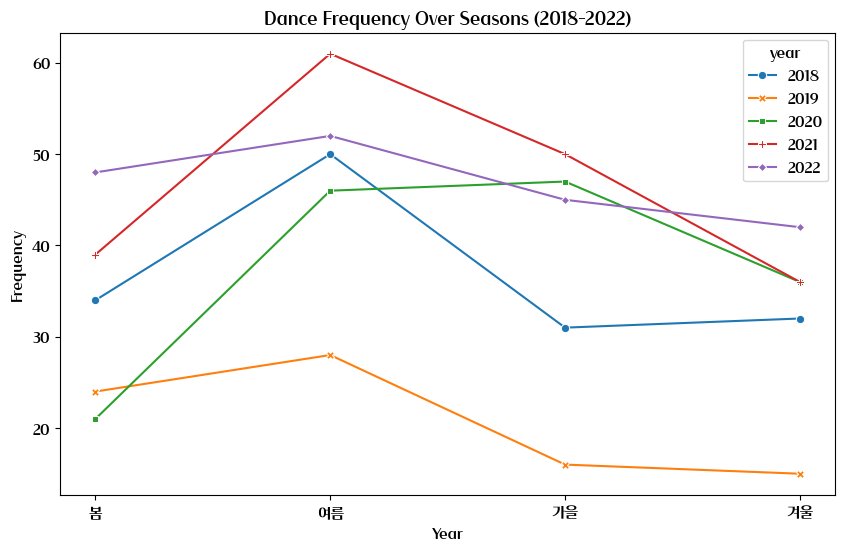

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

dance_df = raw_df[raw_df['장르'] == '댄스']
grouped_df = dance_df.groupby(['year', 'season']).size().reset_index(name='count')

season_order = ['봄', '여름', '가을', '겨울']
grouped_df['season'] = pd.Categorical(grouped_df['season'], categories=season_order, ordered=True)

pivot_df = grouped_df.pivot(index='season', columns='year', values='count').fillna(0)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()

plt.rc('font', family=font_name)

plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_df, markers=True, dashes=False)

plt.title('Dance Frequency Over Seasons (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()